In [0]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF



In [2]:
# read in the data as pandas dataframes
#.sort_values(0) sorts ascending
fileName='https://raw.githubusercontent.com/prashansa/implementAI-CAEchallenge/master/CAE_dataset.csv'
df = pd.read_csv(fileName)
#df[0:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385768 entries, 0 to 385767
Data columns (total 13 columns):
Unnamed: 0    385768 non-null int64
0             383289 non-null float64
1             383289 non-null float64
2             383289 non-null float64
3             383289 non-null float64
4             383245 non-null float64
5             383289 non-null float64
6             383289 non-null float64
7             383289 non-null float64
8             383289 non-null float64
9             383287 non-null float64
label         385768 non-null int64
Id            385768 non-null int64
dtypes: float64(10), int64(3)
memory usage: 38.3 MB


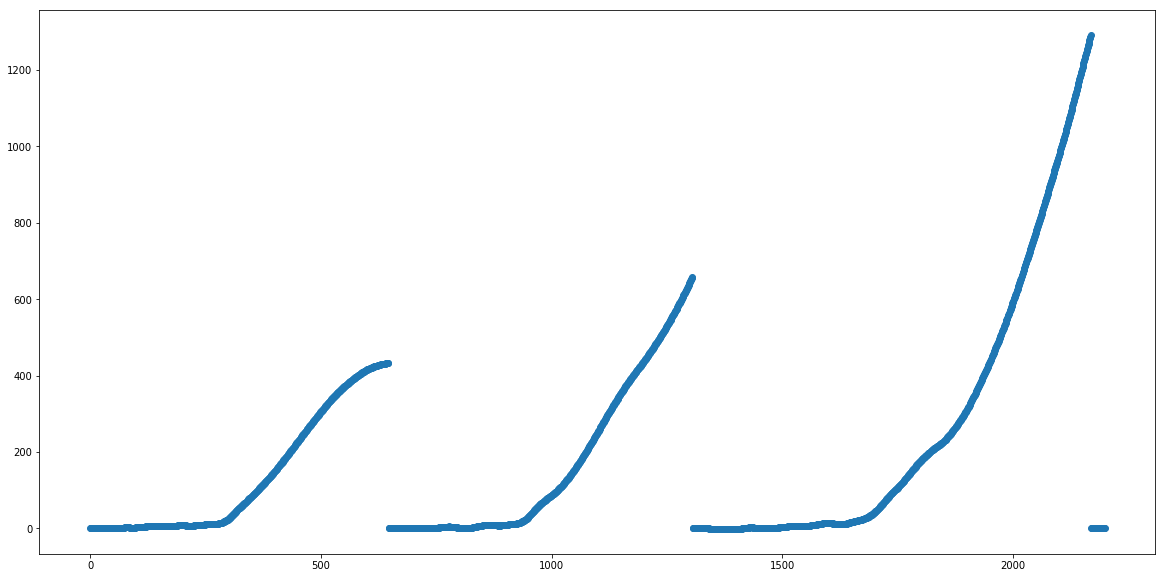

In [3]:
x = df.iloc[:,0] #the zeroth column has no name
y0 = df['0']
y1 = df['1']
y2 = df['2']
y3 = df['3']
y4 = df['4']
y5 = df['5']
y6 = df['6']
y7 = df['7']
y8 = df['8']
y9 = df['9']


#df.hist()


l = 2200
plt.figure(figsize=(20,10))

plt.scatter(x[0:l],y0[0:l])




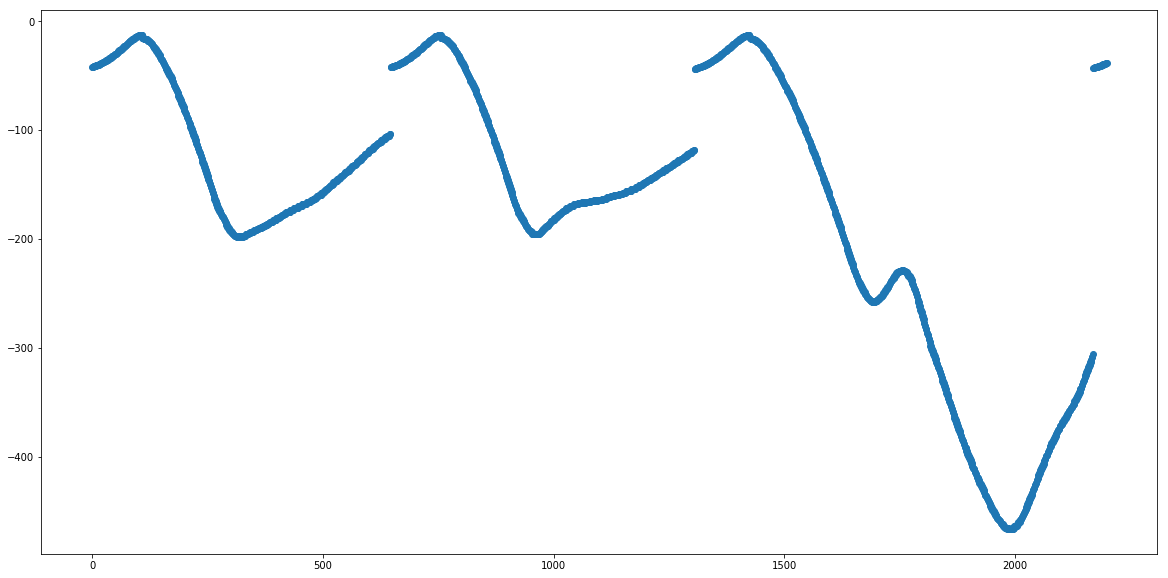

In [4]:
plt.figure(figsize=(20,10))

plt.scatter(x[0:l],y1[0:l])

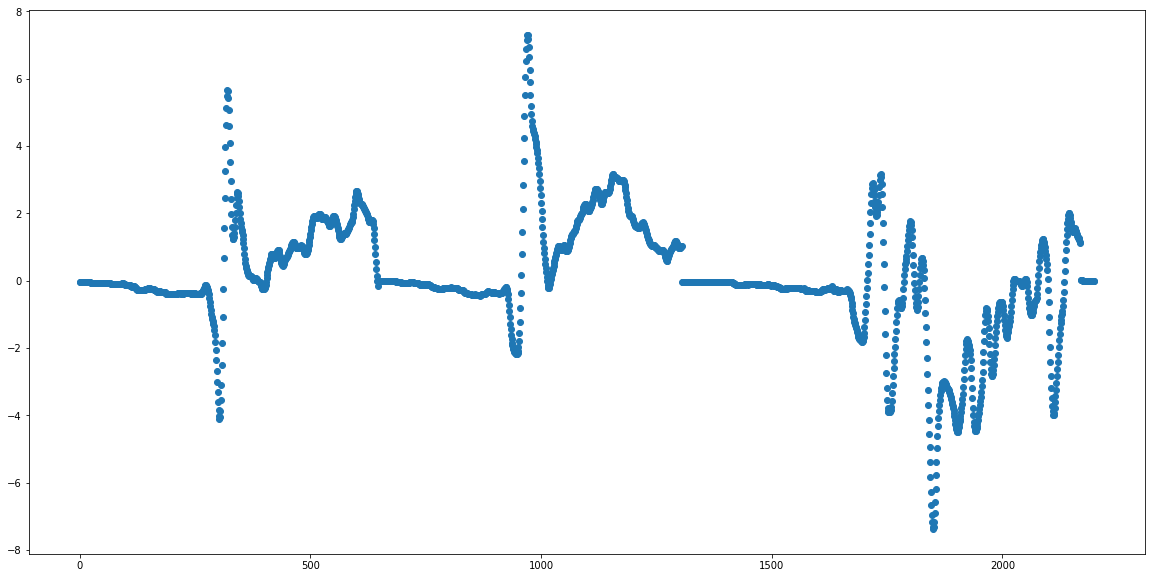

In [5]:
plt.figure(figsize=(20,10))

plt.scatter(x[0:l],y2[0:l])


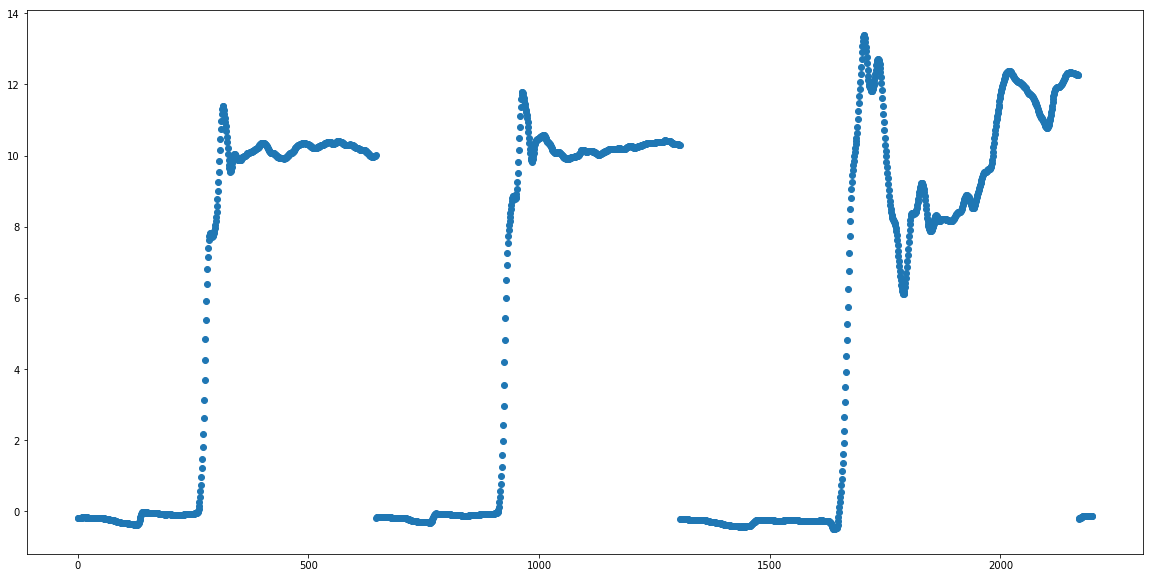

In [6]:
plt.figure(figsize=(20,10))

plt.scatter(x[0:l],y3[0:l])


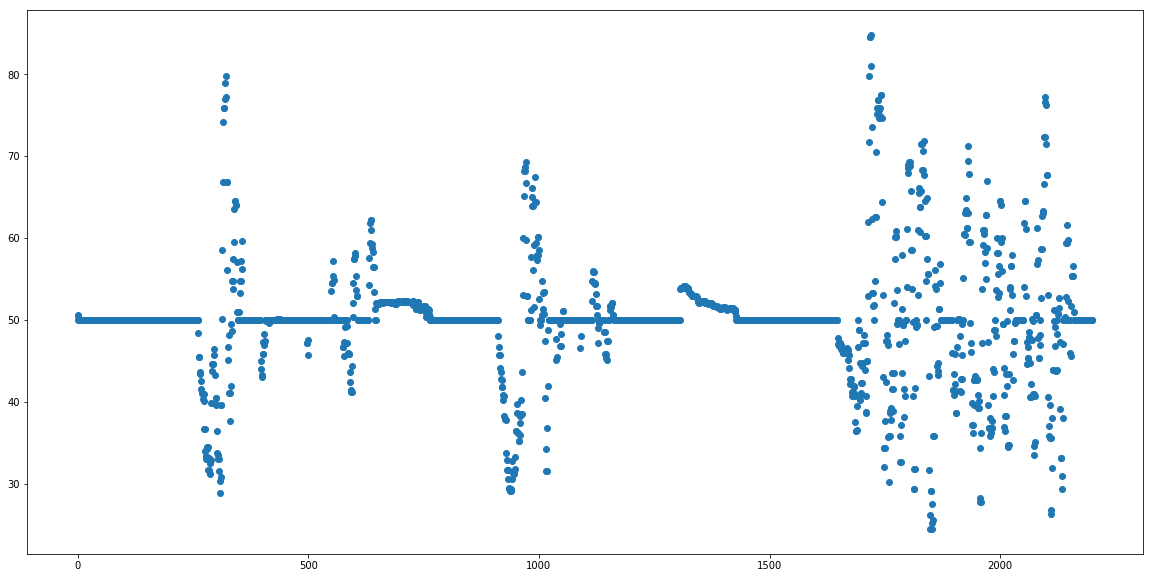

In [7]:
plt.figure(figsize=(20,10))

plt.scatter(x[0:l],y4[0:l])


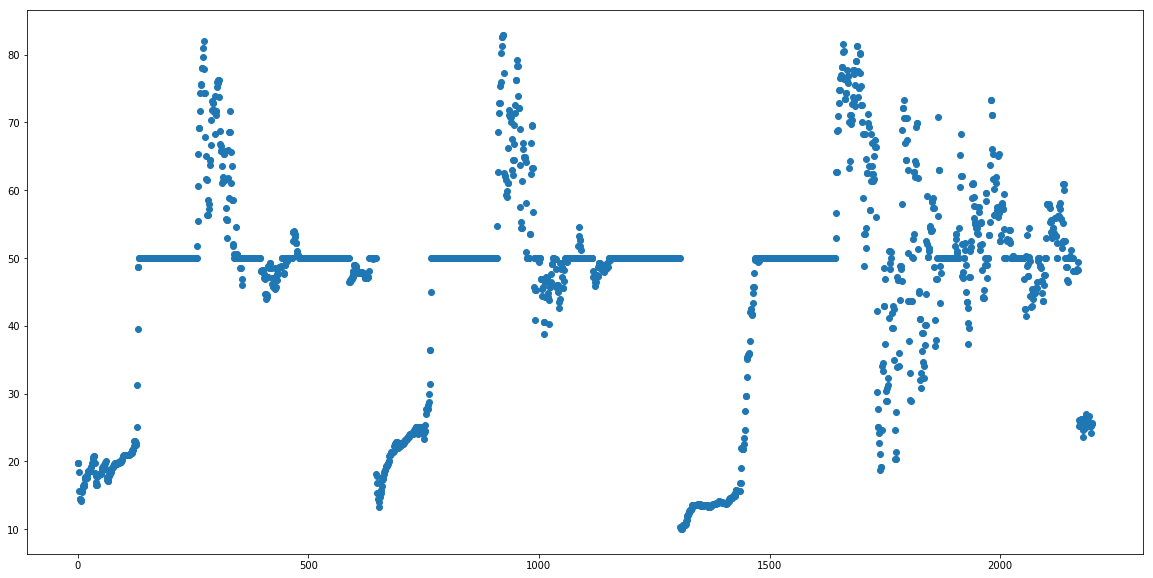

In [8]:
plt.figure(figsize=(20,10))

plt.scatter(x[0:l],y5[0:l])


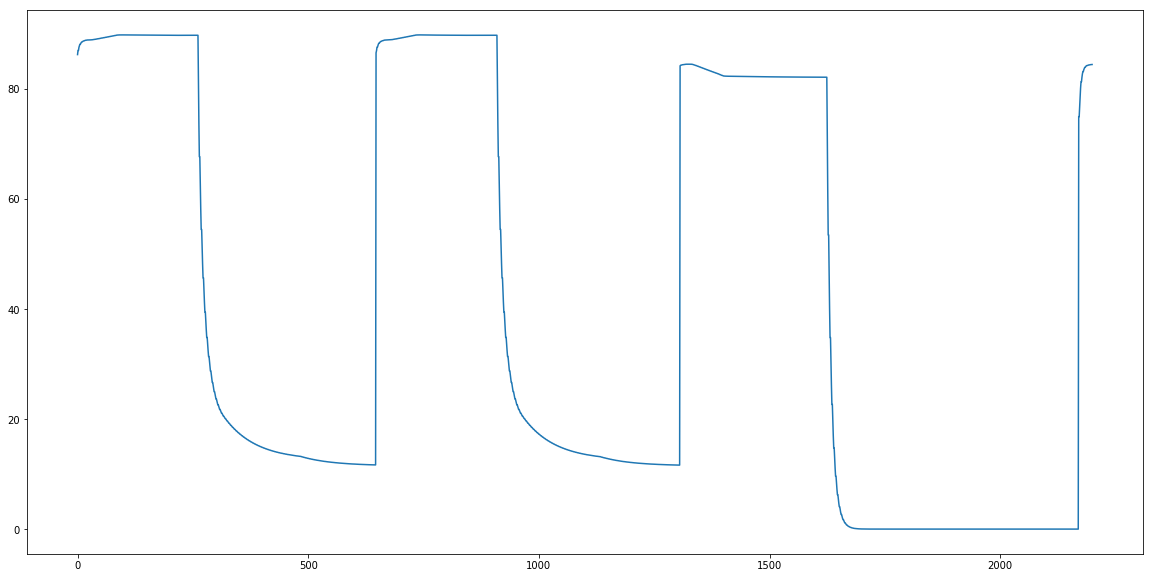

In [9]:
plt.figure(figsize=(20,10))

plt.plot(x[0:l],y6[0:l])


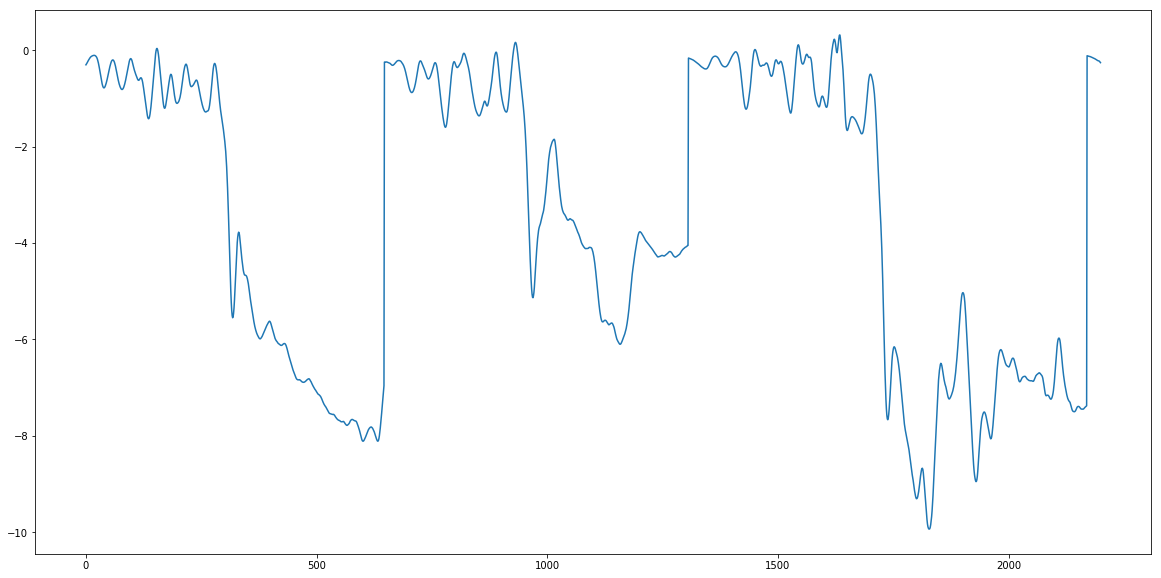

In [10]:
plt.figure(figsize=(20,10))

plt.plot(x[0:l],y7[0:l])


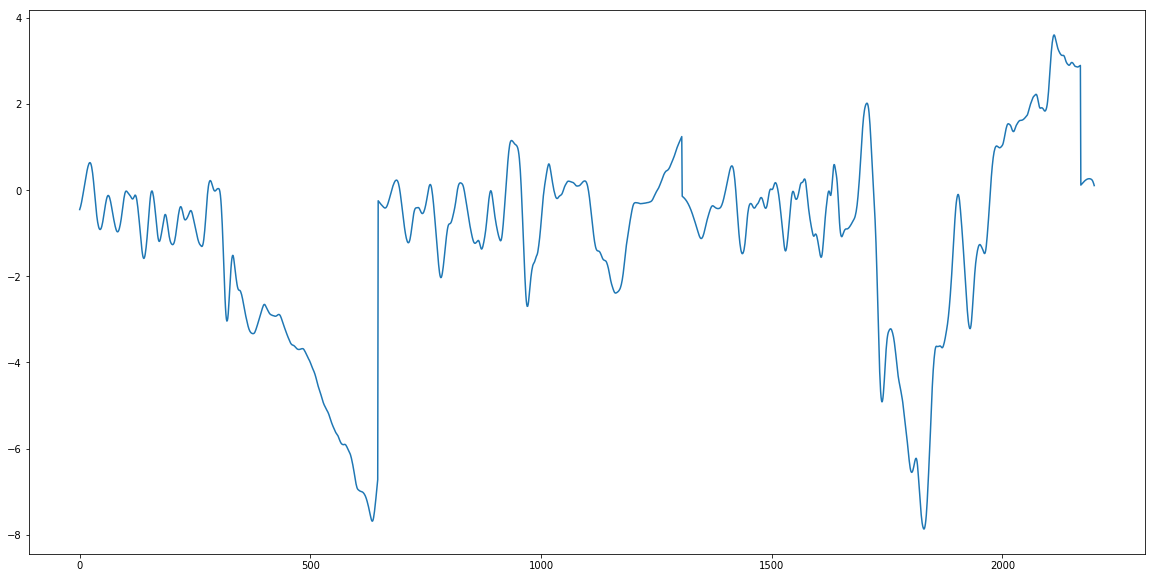

In [11]:
plt.figure(figsize=(20,10))

plt.plot(x[0:l],y8[0:l])


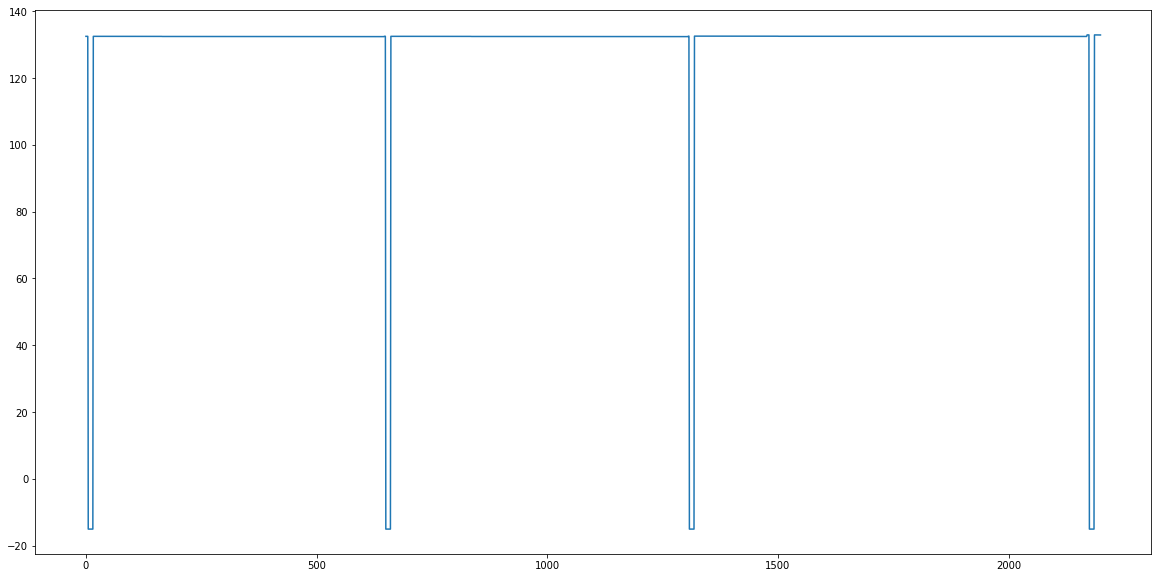

In [12]:
plt.figure(figsize=(20,10))

plt.plot(x[0:l],y9[0:l])


In [13]:
uniquepilotids = np.unique(df['Id'])
print uniquepilotids
uniquepilotids.size

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

444

In [14]:
np.isnan(np.nan)


True

In [15]:
#remove NaN values
k = df.loc[df.Id == uniquepilotids[10]]
print k.size
print k
#nanarray = np.isnan(k)
#print nanarray.size
#np.where(nanarray)
k.isnull().any()
sum = k.isnull().sum()

9009
        Unnamed: 0           0          1  ...         9  label  Id
124920      124920   -0.010687  -42.41204  ...  137.4611      0  10
124921      124921   -0.007612  -42.41204  ...  137.4611      0  10
124922      124922   -0.004486  -42.15623  ...  137.4611      0  10
124923      124923   -0.001309  -42.15623  ...  137.4611      0  10
124924      124924    0.001917  -41.88447  ...  137.4611      0  10
124925      124925    0.005195  -41.88447  ...  -15.0000      0  10
124926      124926    0.008524  -41.59200  ...  -15.0000      0  10
124927      124927    0.011902  -41.59200  ...  -15.0000      0  10
124928      124928    0.015321  -41.28041  ...  -15.0000      0  10
124929      124929    0.018776  -41.28041  ...  -15.0000      0  10
124930      124930    0.022345  -40.95430  ...  -15.0000      0  10
124931      124931    0.026189  -40.95430  ...  -15.0000      0  10
124932      124932    0.030490  -40.61846  ...  -15.0000      0  10
124933      124933    0.035400  -40.61846  

In [16]:
for id in uniquepilotids[0:1]:
    print df.loc[df.Id == id]
    

        Unnamed: 0           0          1  ...         9  label  Id
130185      130185    1.007932  -29.73957  ...  133.4319      0   0
130186      130186    1.032540  -29.48932  ...  133.4319      0   0
130187      130187    1.057430  -29.48932  ...  133.4319      0   0
130188      130188    1.108736  -29.22692  ...  133.4319      0   0
130189      130189    1.108736  -29.22692  ...  133.4319      0   0
130190      130190    1.134505  -28.95033  ...  -15.0000      0   0
130191      130191    1.160126  -28.95033  ...  -15.0000      0   0
130192      130192    1.185245  -28.66078  ...  -15.0000      0   0
130193      130193    1.234975  -28.36117  ...  -15.0000      0   0
130194      130194    1.234975  -28.36117  ...  -15.0000      0   0
130195      130195    1.259123  -28.36117  ...  -15.0000      0   0
130196      130196    1.283230  -28.05359  ...  -15.0000      0   0
130197      130197    1.306943  -28.05359  ...  -15.0000      0   0
130198      130198    1.351988  -27.73760  ...  

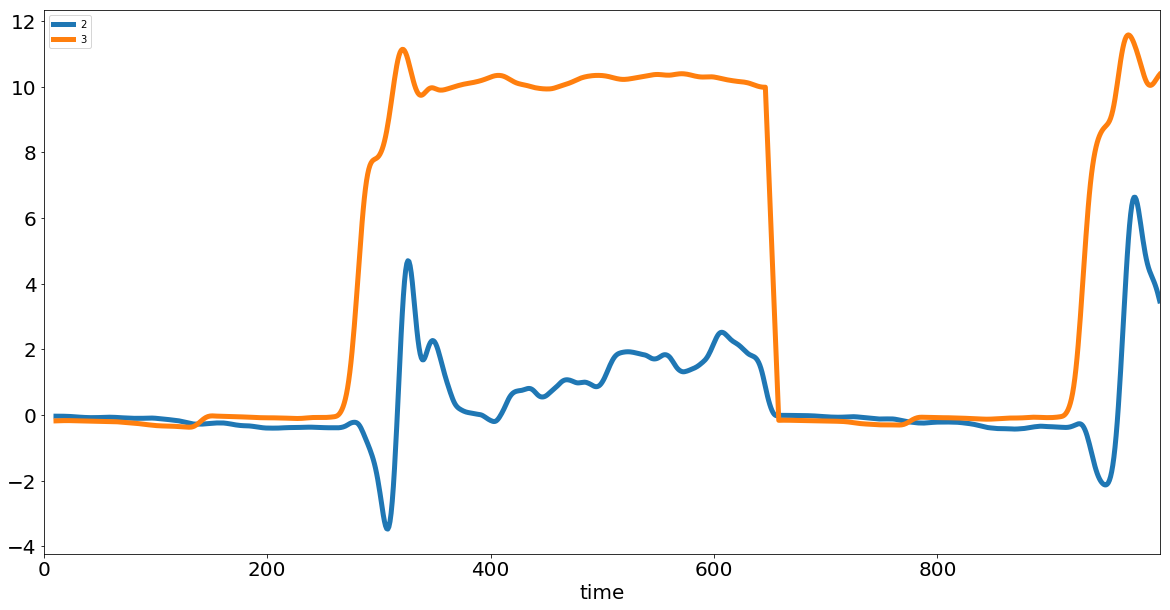

In [17]:
#rolling mean to smooth out ? 


feature2 = df['2']
feature3 = df['3']
#feature[0:1000].rolling(10).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
#feature[0:1000].plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);


df_rm = pd.concat([feature2.rolling(12).mean(), feature3.rolling(12).mean()], axis=1)
df_rm[0:1000].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('time', fontsize=20);



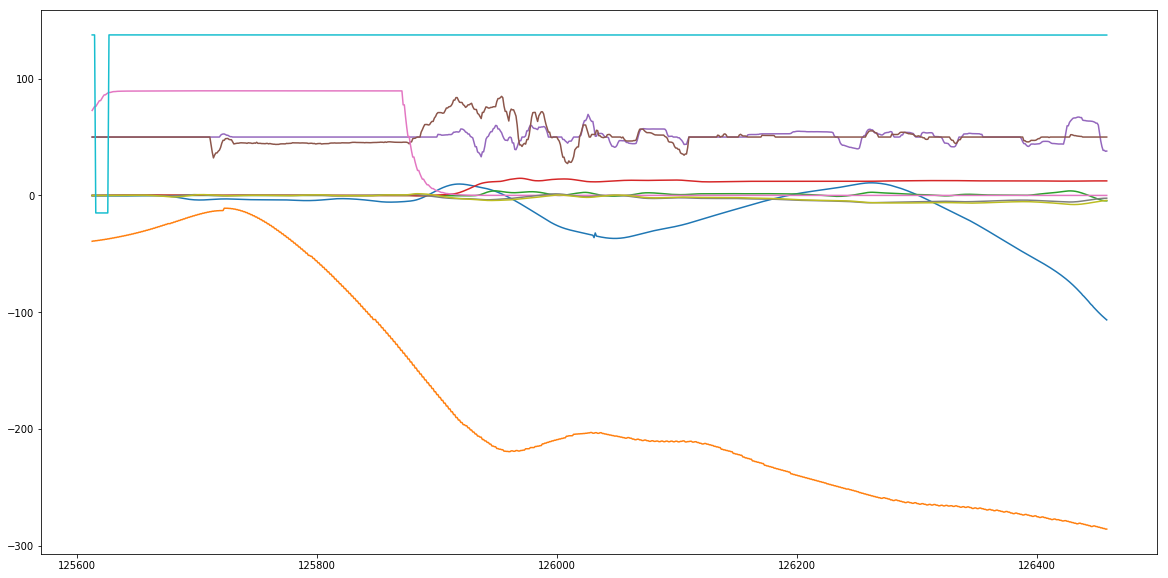

In [18]:
#plot all features for a given pilot 

id = 45
plt.figure(figsize=(20,10))

plt.plot(df.loc[df.Id == id]['0'])
plt.plot(df.loc[df.Id == id]['1'])
plt.plot(df.loc[df.Id == id]['2'])
plt.plot(df.loc[df.Id == id]['3'])
plt.plot(df.loc[df.Id == id]['4'])
plt.plot(df.loc[df.Id == id]['5'])
plt.plot(df.loc[df.Id == id]['6'])
plt.plot(df.loc[df.Id == id]['7'])
plt.plot(df.loc[df.Id == id]['8'])
plt.plot(df.loc[df.Id == id]['9'])

In [19]:
print df.loc[df.Id==0].shape

(907, 13)


In [20]:
# read in the data as pandas dataframes
#.sort_values(0) sorts ascending
fileName='https://raw.githubusercontent.com/prashansa/implementAI-CAEchallenge/master/CAE_dataset.csv'
df = pd.read_csv(fileName)
#print(df.shape)
#df[0:5]
#f.hist(figsize = (7,8))
#plt.tight_layout()
#df.plot.hist(x='label', y='Id')
#df.info()
#df.describe()
df.rename(columns={'Unnamed: 0':'time'}, 
                 inplace=True)


def reset_time(row):
  if row["Id"] != prev_index:
    prev_index = row["Id"]
    prev_time = row["time"]
  
  row["time"] = row["time"] - prev_time
  
  
#df.apply(reset_time, axis=1)
#temp_df = df.copy()

prev_index = 327
prev_time = 0
for i,value in df.iterrows():
  if i % 10000 == 0:
    print(i)

  if value["Id"]!=prev_index:
    prev_index=value["Id"]
    prev_time=value["time"]
  value["time"] -= prev_time
  df.iloc[i] = value

  
  
#clf=RandomForestClassifier(n_jobs=2, random_state=0)
#clf.fit()
df.Id.unique()

temp_df=df.copy()
temp_df[550:650]

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000


,time,0,1,2,3,4,5,6,7,8,9,label,Id
550,550.0,370.623399,-138.75890,1.911946,10.349947,53.476562,50.000000,12.14971,-7.684015,-5.505250,132.4041,0.0,327.0
551,551.0,371.708323,-138.60480,1.930196,10.342845,54.492188,50.000000,12.13740,-7.692774,-5.530098,132.4041,0.0,327.0
552,552.0,372.785690,-138.60480,1.922936,10.336633,54.492188,50.000000,12.13740,-7.702048,-5.556858,132.4028,0.0,327.0
553,553.0,373.854008,-137.44650,1.896909,10.332765,55.312500,50.000000,12.12543,-7.706827,-5.582890,132.4028,0.0,327.0
554,554.0,374.912003,-137.44650,1.861700,10.329373,57.148438,50.000000,12.11363,-7.708964,-5.606049,132.4028,0.0,327.0
555,555.0,375.960716,-137.27960,1.810122,10.333499,54.843750,50.000000,12.10208,-7.709558,-5.625696,132.4028,0.0,327.0
556,556.0,377.000287,-137.27960,1.746993,10.340939,50.351562,50.000000,12.10208,-7.705957,-5.641058,132.4028,0.0,327.0
557,557.0,378.031309,-136.09860,1.680591,10.348827,50.000000,50.000000,12.09065,-7.701228,-5.654025,132.4028,0.0,327.0
558,558.0,379.054628,-136.09860,1.618558,10.354334,50.000000,50.000000,12.07941,-7.700640,-5.667785,132.4028,0.0,327.0
559,559.0,380.071966,-134.91970,1.555865,10.362709,50.000000,50.000000,12.06846,-7.707398,-5.685034,132.4028,0.0,327.0


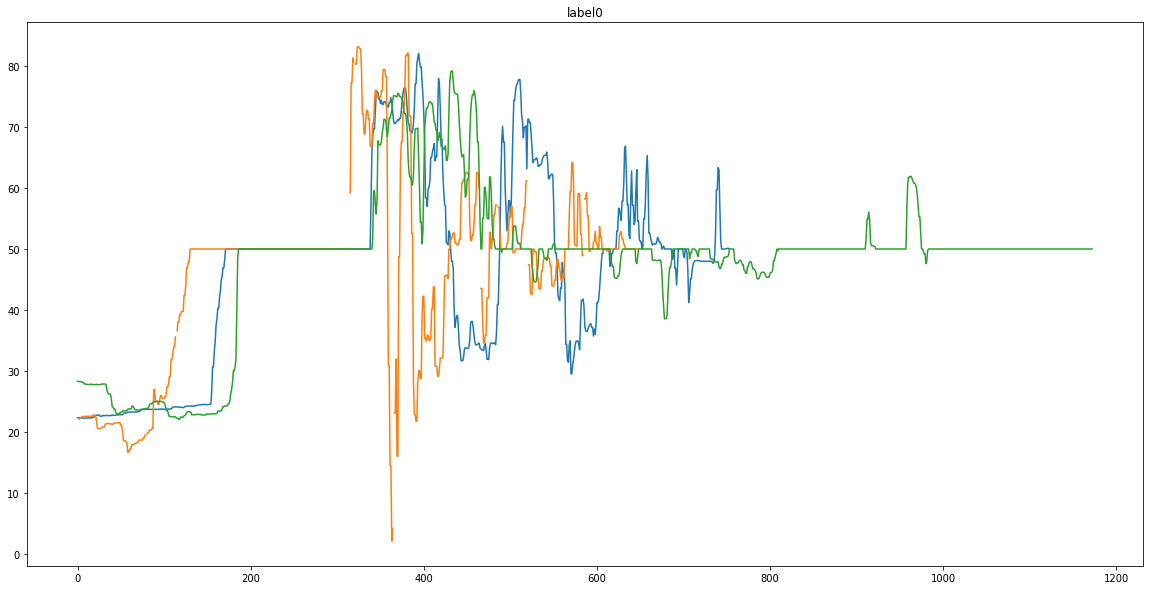

In [21]:
#plotting only label 0 values for a given feature to observe any trends that separate label 0 and 1.
plt.figure(figsize=(20,10))


for id in uniquepilotids[20:25]:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  if label.values[0]==0:
    #print 'only label0'
    feature = df.loc[df.Id==id]['5']
    time     = df.loc[df.Id==id]['time']
    #print feature.shape
    plt.title('label0')
    plt.plot(time, feature)
  

 # pd.Series(label).array
 # label = label.reshape(-1,1)
 # print label.shape
  #if label[0]==:
   # print 'only label = 0'
    #feature2 = df.loc[df.Id==id]['2']
    #print feature2.shape
    #plt.plot(feature2, label)

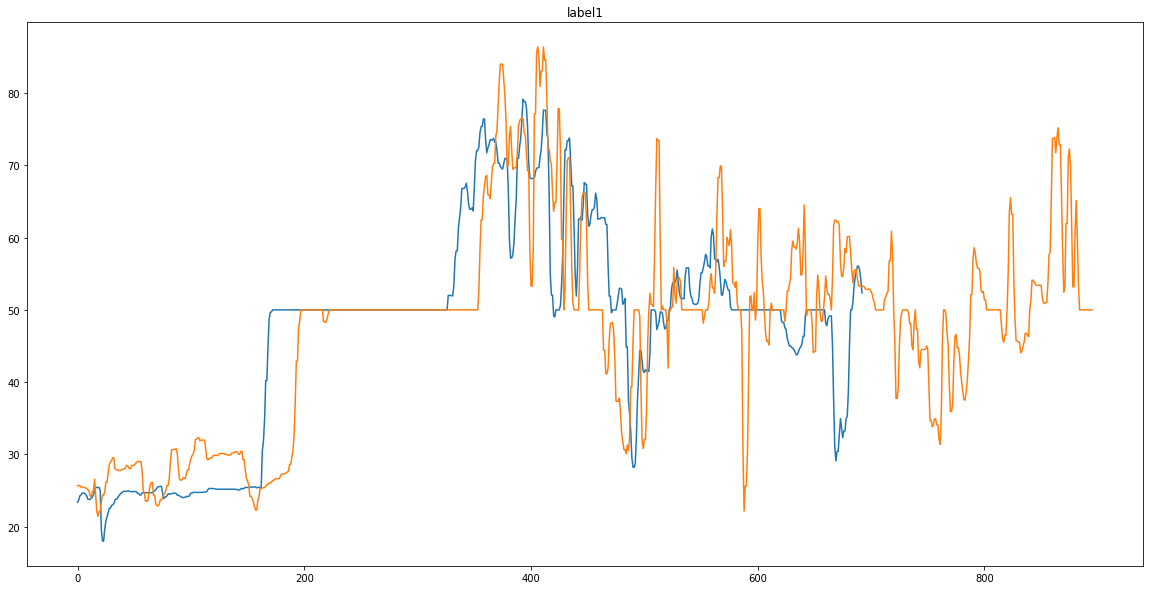

In [22]:
#plotting only label 1 values for a given feature
plt.figure(figsize=(20,10))

for id in uniquepilotids[20:25]:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  if label.values[0]==1:
    #print 'only label1'
    feature2 = df.loc[df.Id==id]['5']
    time     = df.loc[df.Id==id]['time']
    #print feature2.shape
    plt.title('label1')
    plt.plot(time, feature2)

[1.]
[0.]
[1.]
[1.]
[0.]


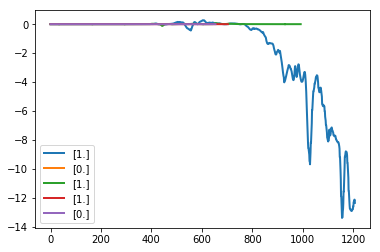

In [23]:
#take all features as parameter of a performance function and see its evolution with time for a given pilot
#y = (a1*a2...a10) * time
#cant see any features with this simplification :( 

fig, ax = plt.subplots()


for id in uniquepilotids[50:55]: 
  df_chosen = df.loc[df.Id==id]
  y = np.zeros(len(df_chosen['time']))
  #print df_chosen
  for t in df_chosen['time']:
    #y = df_chosen.loc[df_chosen.time==t]['0'] * df_chosen.loc[df_chosen.time==t]['1'] * df_chosen.loc[df_chosen.time==t]['2'] * df_chosen.loc[df_chosen.time==t]['3']* df_chosen.loc[df_chosen.time==t]['4'] * df_chosen.loc[df_chosen.time==t]['5'] * df_chosen.loc[df_chosen.time==t]['6'] * df_chosen.loc[df_chosen.time==t]['7'] * df_chosen.loc[df_chosen.time==t]['8'] * df_chosen.loc[df_chosen.time==t]['9'] * t
    y[int(t)] = t * df_chosen.loc[df_chosen.time==t]['0'] * df_chosen.loc[df_chosen.time==t]['1'] * df_chosen.loc[df_chosen.time==t]['2'] * df_chosen.loc[df_chosen.time==t]['3']* df_chosen.loc[df_chosen.time==t]['4'] * df_chosen.loc[df_chosen.time==t]['5'] * df_chosen.loc[df_chosen.time==t]['6'] * df_chosen.loc[df_chosen.time==t]['7'] * df_chosen.loc[df_chosen.time==t]['8'] * df_chosen.loc[df_chosen.time==t]['9'] 
    #print t
    #print y[int(t)]
  print df_chosen.loc[df_chosen.time==t]['label'].values
  line, = ax.plot(df_chosen['time'],y/1e17, lw=2, label='{}'.format(df_chosen.loc[df_chosen.time==t]['label'].values))
  plt.legend(loc='lower left')
  #plt.plot(df_chosen['time'],y)
  #plt.pause(2)

  


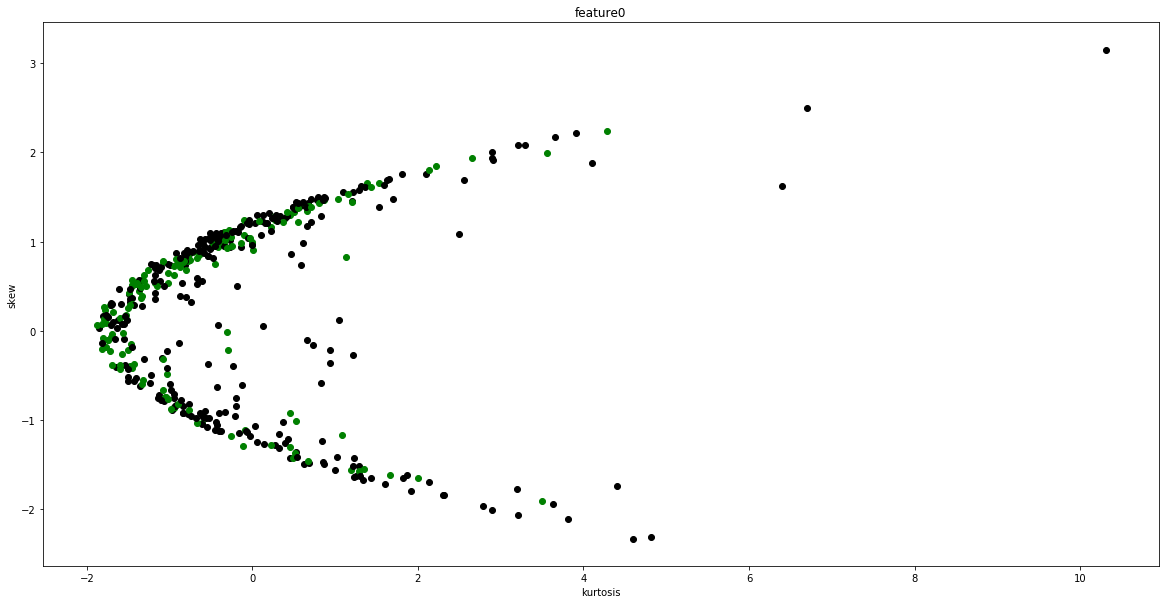

In [24]:
from scipy.stats import kurtosis, skew

plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  
  feature0 = df.loc[df.Id==id]['0']
  feature0 = feature0.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature0)
  #print skew(feature0)
  if label.values[0]==0:  
    plt.scatter(kurtosis(feature0), skew(feature0), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature0), skew(feature0), c='g')
    plt.xlabel('kurtosis')
    plt.ylabel('skew')
    plt.title('feature0')


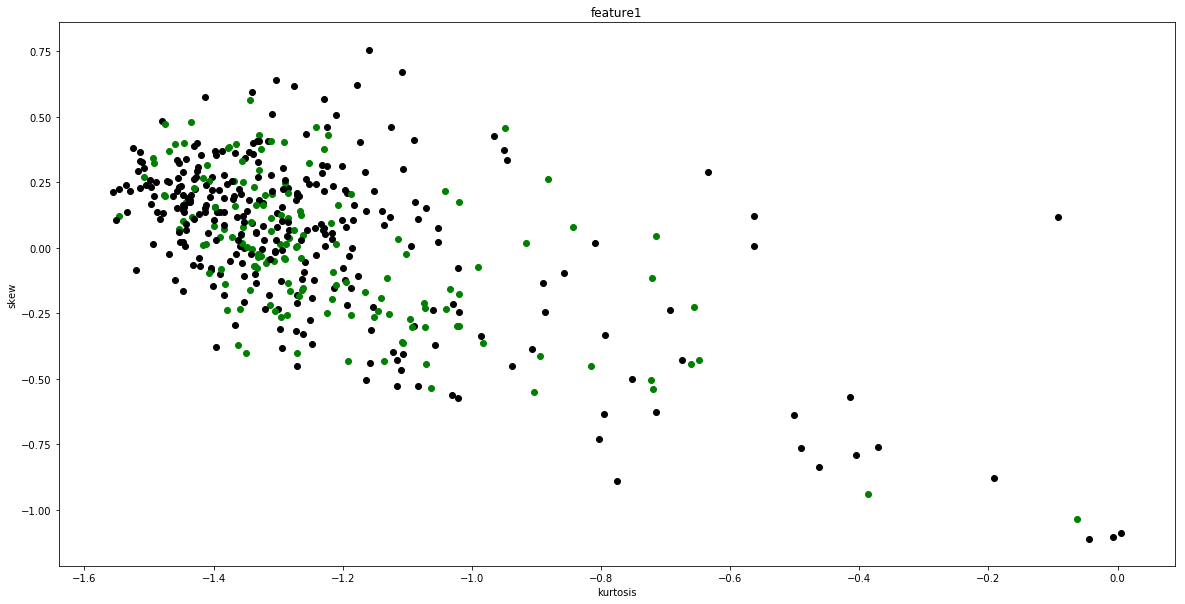

In [25]:
plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  
  feature1 = df.loc[df.Id==id]['1']
  feature1 = feature1.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature1)
  #print skew(feature1)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature1), skew(feature1), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature1), skew(feature1), c='g')
    plt.xlabel('kurtosis')
    plt.ylabel('skew')
    plt.title('feature1')
    

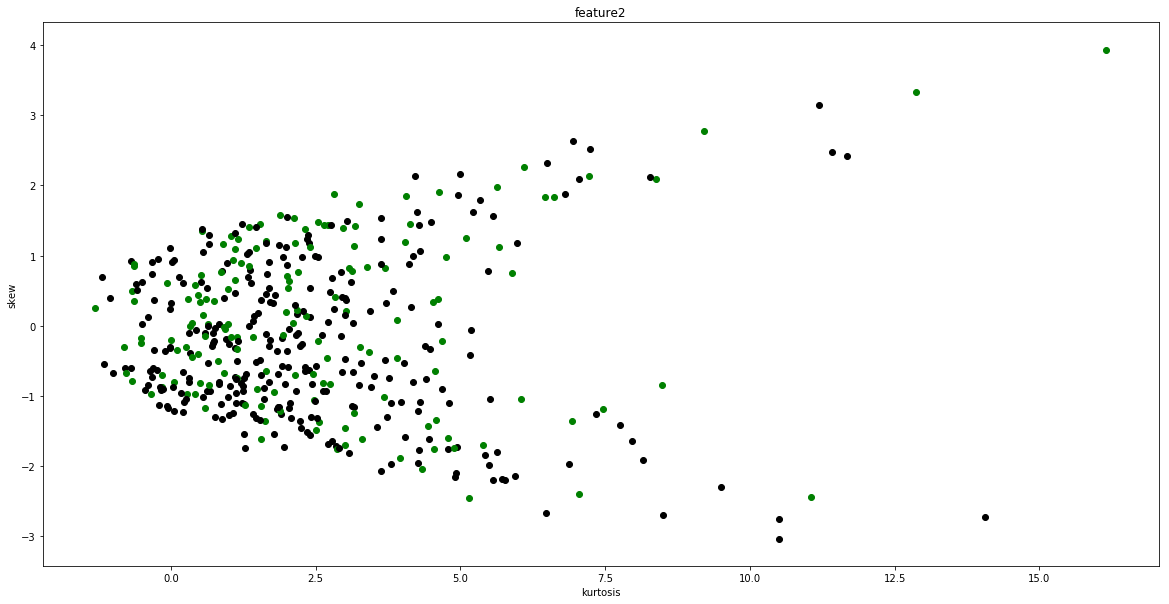

In [26]:
plt.figure(figsize=(20,10))


for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  
  feature2 = df.loc[df.Id==id]['2']
  feature2 = feature2.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature2)
  #print skew(feature2)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature2), skew(feature2), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature2), skew(feature2), c='g')
    plt.xlabel('kurtosis')
    plt.ylabel('skew')
    plt.title('feature2')

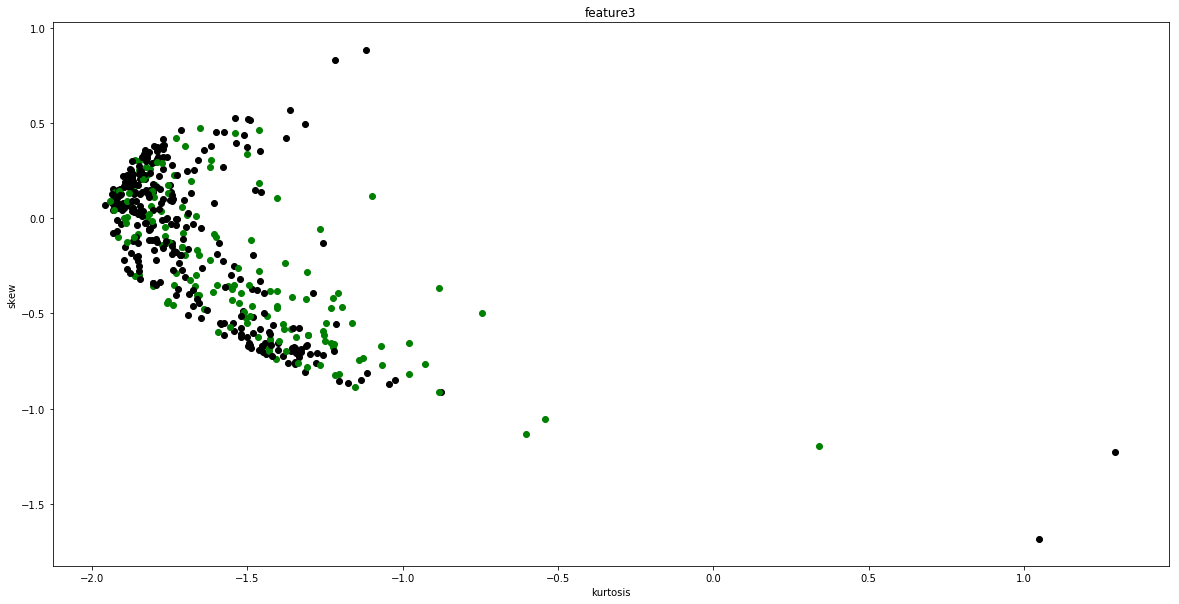

In [27]:
plt.figure(figsize=(20,10))


for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  
  feature3 = df.loc[df.Id==id]['3']
  feature3 = feature3.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature3)
  #print skew(feature3)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature3), skew(feature3), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature3), skew(feature3), c='g')
    plt.xlabel('kurtosis')
    plt.ylabel('skew')
    plt.title('feature3')

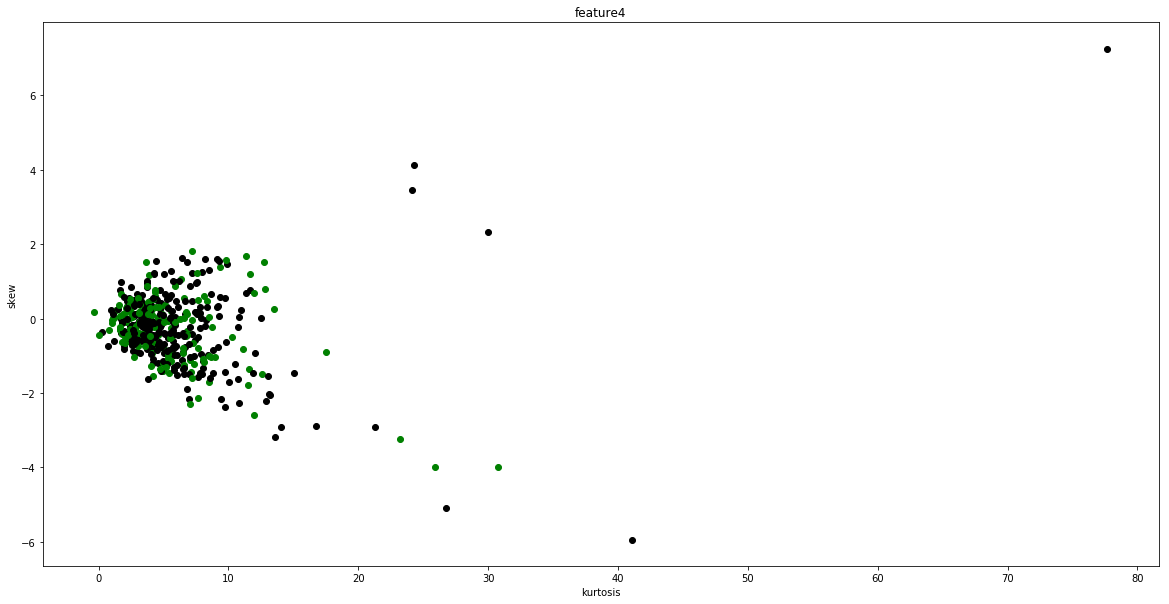

In [28]:

plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  #print  label.values[0]
  
  feature4 = df.loc[df.Id==id]['4']
  feature4 = feature4.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature4)
  #print skew(feature4)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature4), skew(feature4), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature4), skew(feature4), c='g')
    plt.xlabel('kurtosis')
    plt.ylabel('skew')
    plt.title('feature4')
  
    

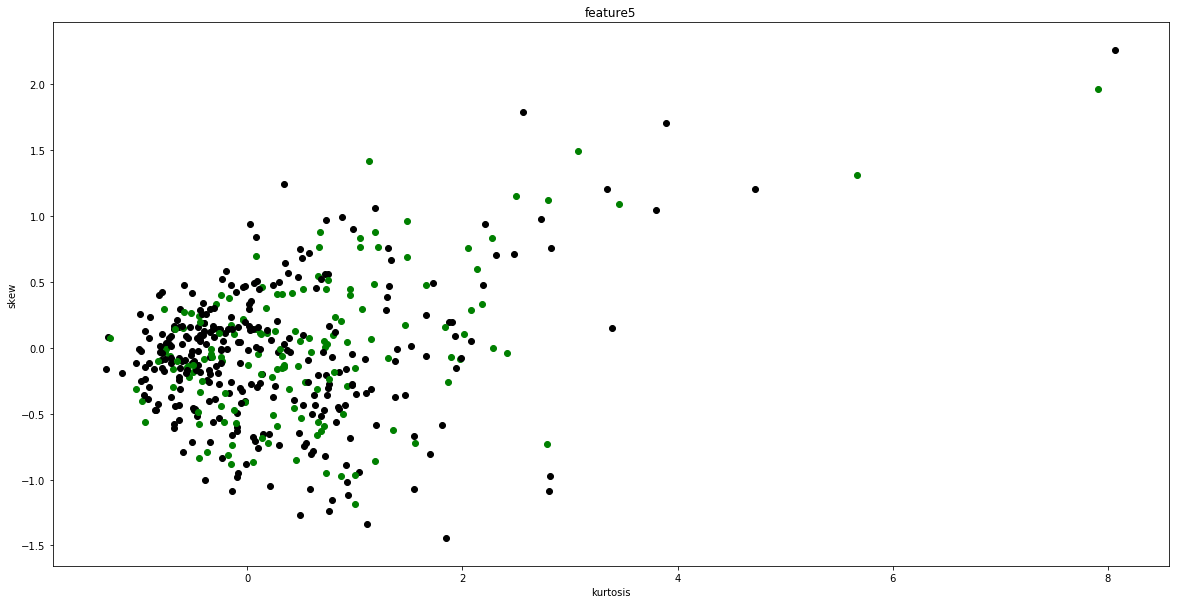

In [29]:

plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  feature5 = df.loc[df.Id==id]['5']
  feature5 = feature5.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature5)
  #print skew(feature5)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature5), skew(feature5), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature5), skew(feature5), c='g')
  plt.xlabel('kurtosis')
  plt.ylabel('skew')
  plt.title('feature5')

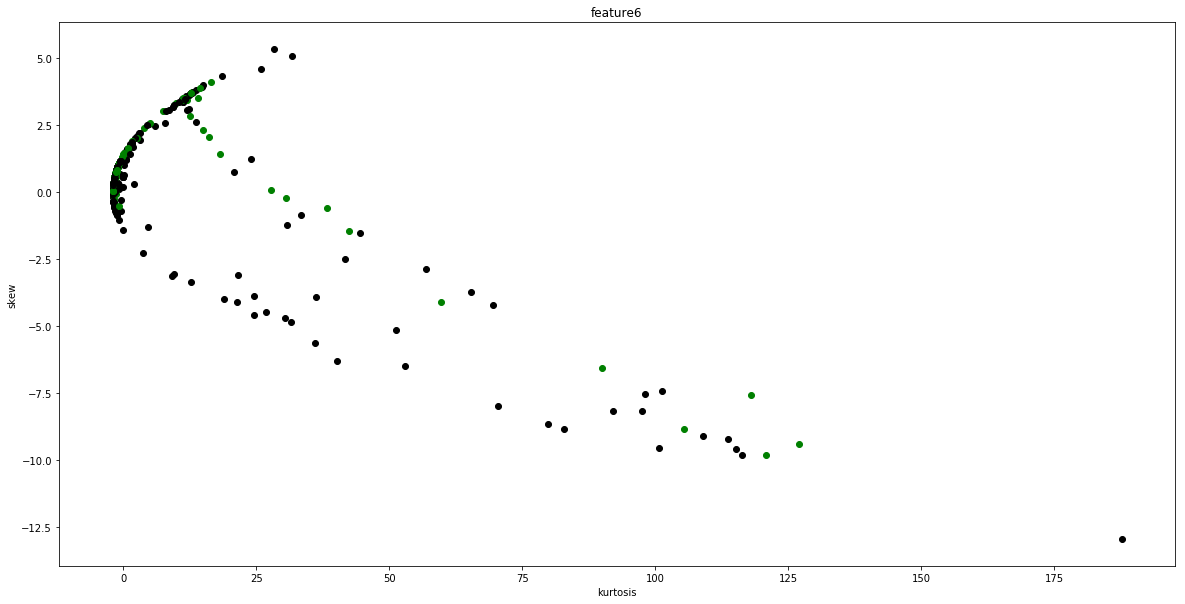

In [30]:
plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  feature6 = df.loc[df.Id==id]['6']
  feature6 = feature6.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature6)
  #print skew(feature6)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature6), skew(feature6), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature6), skew(feature6), c='g')
  plt.xlabel('kurtosis')
  plt.ylabel('skew')
  plt.title('feature6')

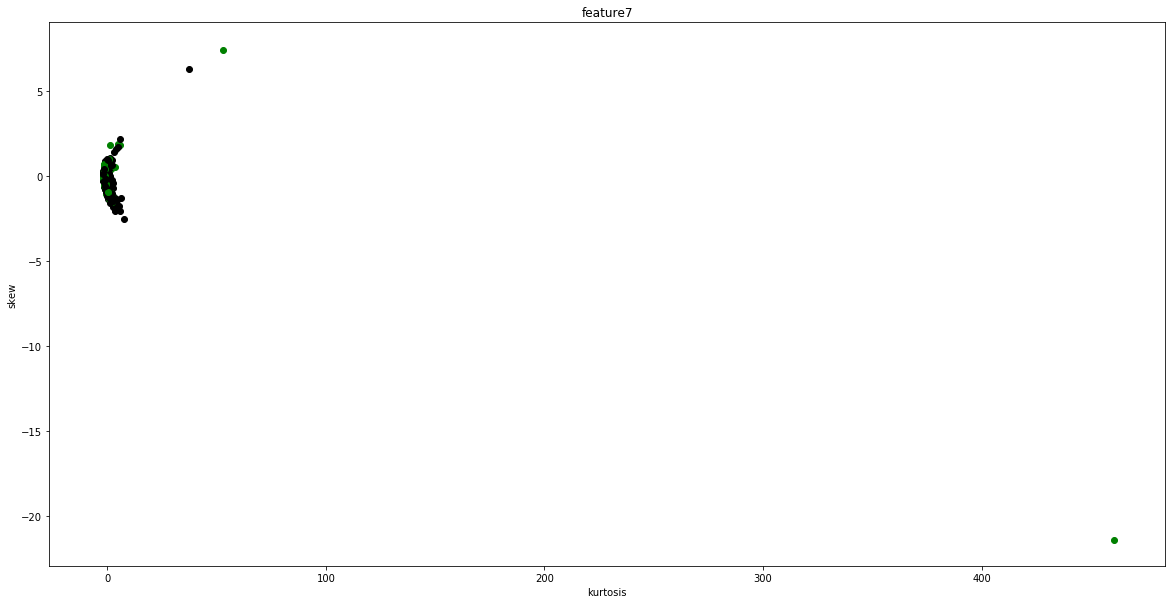

In [31]:
plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  feature7 = df.loc[df.Id==id]['7']
  feature7 = feature7.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature7)
  #print skew(feature7)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature7), skew(feature7), c='k')
  if label.values[0]==1:
     plt.scatter(kurtosis(feature7), skew(feature7), c='g')
  plt.xlabel('kurtosis')
  plt.ylabel('skew')
  plt.title('feature7')

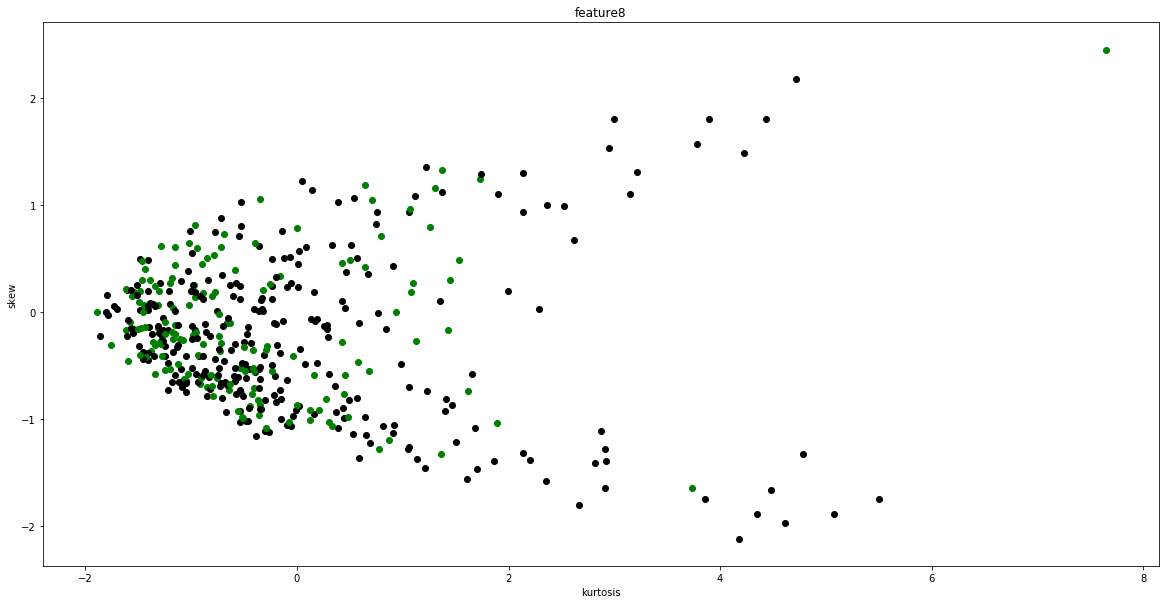

In [32]:
plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  feature8 = df.loc[df.Id==id]['8']
  feature8 = feature8.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature8)
  #print skew(feature8)
  if label.values[0]==0:
    plt.scatter(kurtosis(feature8), skew(feature8), c='k')
  if label.values[0]==1:
    plt.scatter(kurtosis(feature8), skew(feature8), c='g')
  plt.xlabel('kurtosis')
  plt.ylabel('skew')
  plt.title('feature8')

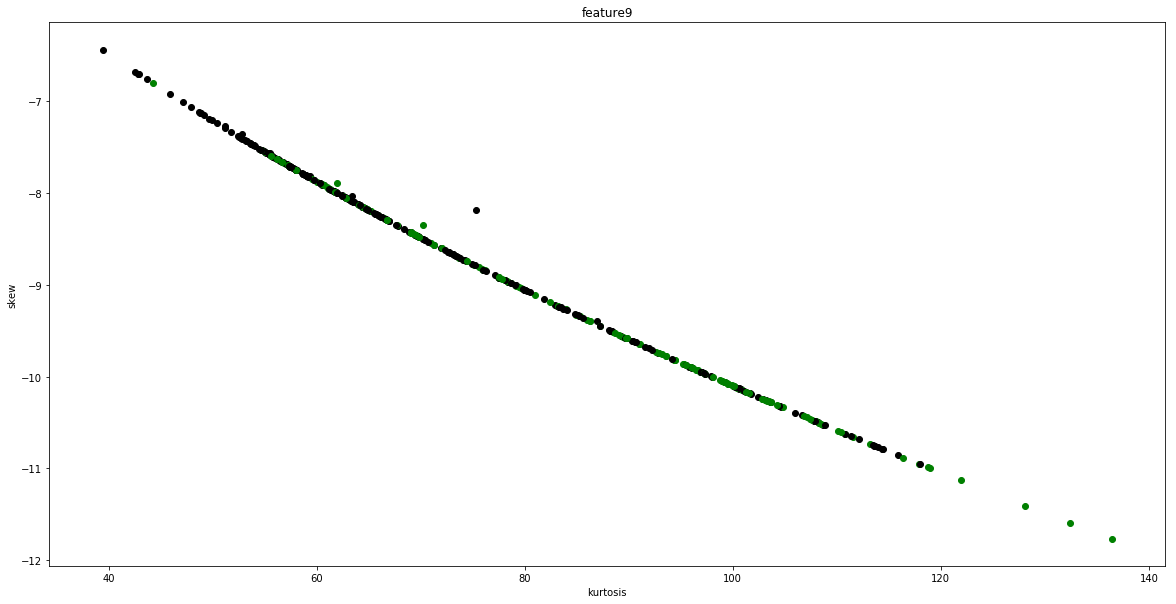

In [40]:
plt.figure(figsize=(20,10))

for id in uniquepilotids:
  label = df.loc[df.Id==id]['label']
  feature9 = df.loc[df.Id==id]['9']
  feature9 = feature9.fillna(method='ffill')
  time     = df.loc[df.Id==id]['time']
  #print kurtosis(feature9)
  #print skew(feature9)
  
  if label.values[0]==0:
    if kurtosis(feature9)>20 and kurtosis(feature9)<150: #just visible from the plot, so I trim the data to see the straight line clearly
      plt.scatter(kurtosis(feature9), skew(feature9), c='k')
  if label.values[0]==1:
    if kurtosis(feature9)>20 and kurtosis(feature9)<150:
      plt.scatter(kurtosis(feature9), skew(feature9), c='g')
  plt.xlabel('kurtosis')
  plt.ylabel('skew')
  plt.title('feature9')

In [0]:
#now trying Gaussian process framework

#for a given pilot, we have 10 parameters that make up a time series. 

In [0]:
from sklearn.preprocessing import StandardScaler


count = 0
number = 200
varianceratio = np.zeros(number)
labelarray = np.zeros(number)

for id in uniquepilotids[0:0+number]: 
 
    df_chosen = df.loc[df.Id==id]
    x = df_chosen.iloc[1:645,1:11]
    y = df_chosen.iloc[1:645,11:12]

    x = x.fillna(df_chosen.mean())
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=1)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'],)

    varianceratio[count] = pca.explained_variance_ratio_
    #print varianceratio[count]
    #print df_chosen['label'].values[0]
    labelarray[count] = df_chosen['label'].values[0]
    count+=1


In [36]:

# Generate data
train_size = 50
rng = np.random.RandomState(0)
#X = rng.uniform(0, 5, 100)[:, np.newaxis]
#y = np.array(X[:, 0] > 2.5, dtype=int)


X = varianceratio.reshape(-1,1)
y = labelarray.reshape(-1,1)

print X.shape
print X
print y.shape
print y




(200, 1)
[[0.33178824]
 [0.57973492]
 [0.45501304]
 [0.61046542]
 [0.53335633]
 [0.372995  ]
 [0.47772458]
 [0.56920876]
 [0.38227397]
 [0.44659977]
 [0.38938605]
 [0.31586258]
 [0.37015364]
 [0.62959377]
 [0.51520167]
 [0.42676133]
 [0.4075606 ]
 [0.3841688 ]
 [0.33946512]
 [0.40835851]
 [0.54366764]
 [0.49162636]
 [0.57909261]
 [0.5889761 ]
 [0.38896639]
 [0.4157101 ]
 [0.56642567]
 [0.30566834]
 [0.49035789]
 [0.42266929]
 [0.37462144]
 [0.36277763]
 [0.32977404]
 [0.45804137]
 [0.61475934]
 [0.47510619]
 [0.43643804]
 [0.441011  ]
 [0.532512  ]
 [0.33471871]
 [0.47628436]
 [0.28144038]
 [0.35132499]
 [0.53252337]
 [0.47675958]
 [0.46968178]
 [0.46648728]
 [0.57042431]
 [0.48895052]
 [0.41402126]
 [0.38727337]
 [0.56491965]
 [0.45629851]
 [0.49522837]
 [0.49713131]
 [0.54519097]
 [0.34513902]
 [0.48050224]
 [0.51056787]
 [0.40759332]
 [0.34482625]
 [0.35863898]
 [0.53779516]
 [0.47347505]
 [0.41575347]
 [0.37574019]
 [0.31987062]
 [0.32288939]
 [0.32225275]
 [0.34520885]
 [0.3876105

Log Marginal Likelihood (initial): -31.067
Log Marginal Likelihood (optimized): -29.563
Accuracy: 0.720 (initial) 0.720 (optimized)
Log-loss: 0.585 (initial) 0.528 (optimized)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


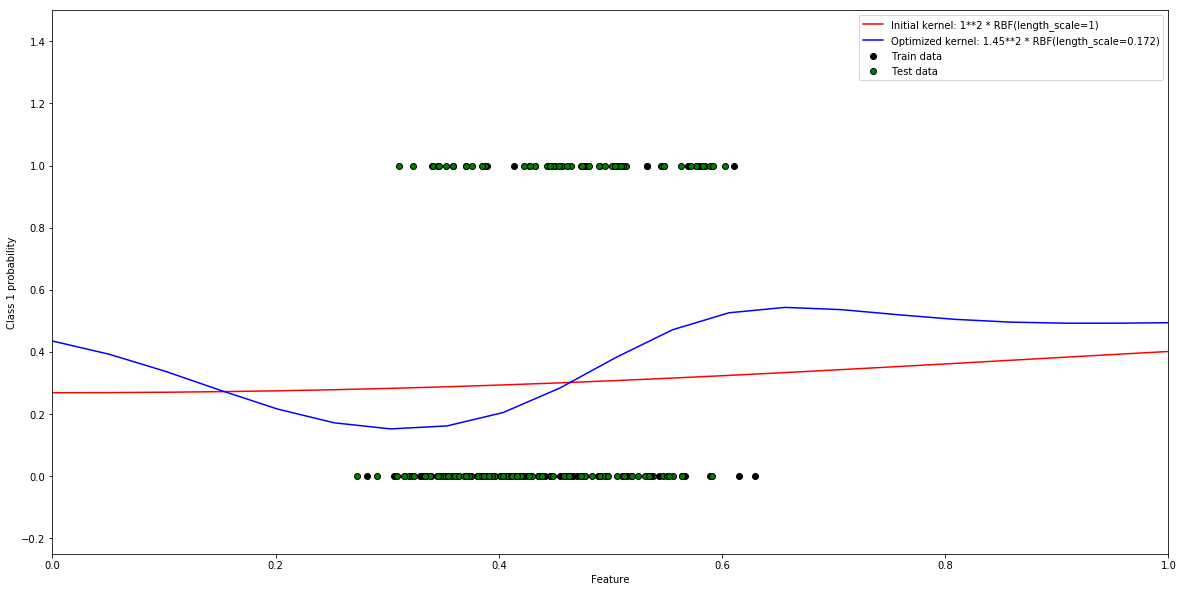

In [37]:


# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])),
         accuracy_score(y[:train_size], gp_opt.predict(X[:train_size]))))
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]),
         log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1])))


# Plot posteriors
plt.figure(figsize=(20,10))
plt.scatter(X[:train_size, 0], y[:train_size], c='k', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X[train_size:, 0], y[train_size:], c='g', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 1)
plt.ylim(-0.25, 1.5)
plt.legend(loc="upper right")



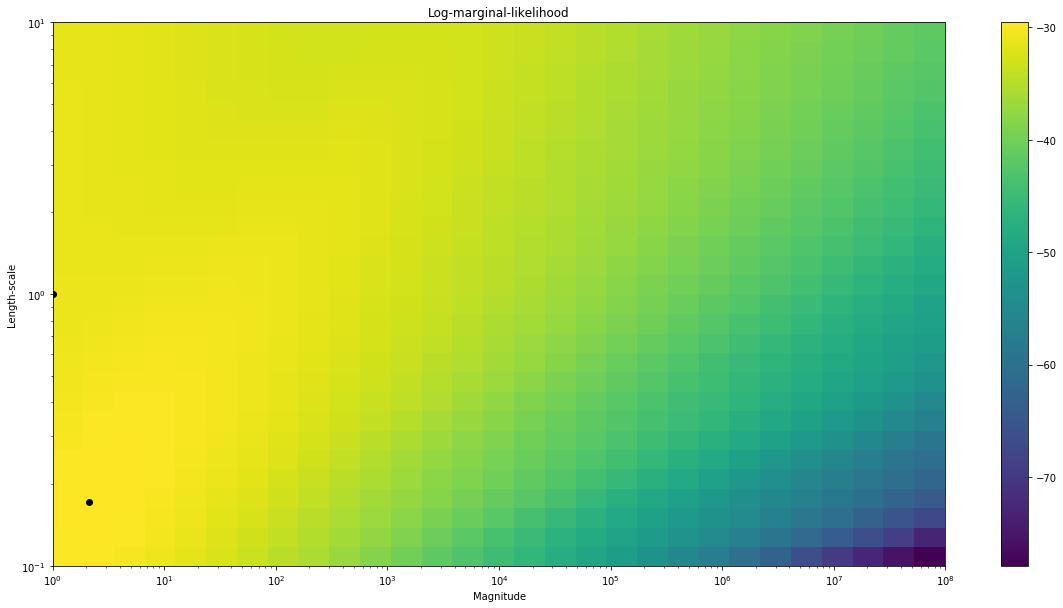

In [38]:
# Plot LML landscape
plt.figure(figsize=(20,10))

theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()